(384, 512, 3)


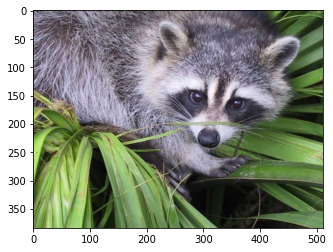

In [44]:
from imageio import imread
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import scipy
import math
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import math
import pdb;

img = Image.open('racoon.jpg')
plt.imshow(img)
print(np.shape(img))
plt.show()
racoon = imread('racoon.jpg')

In [4]:
#downscale image
#Pad image
#get neighborhood for each pixel
#match up said neighborhood with original image corresponding pixel
#triplicate each neighborhood 3 times so to match with each color of each pixel
#put each neighborhood/pixel pair into a matrix
#set up matrix in the proper way for least squares regression
#run the calculations
#profit

In [54]:
def performRegression(images):
    neighborhoods = []

    images0r = []
    images0g = []
    images0b = []
    images1r = []
    images1g = []
    images1b = []
    images2r = []
    images2g = []
    images2b = []
    images3r = []
    images3g = []
    images3b = []
    
    for image in images:
        downscaled = downscaleImage(image)
        np.concatenate((neighborhoods,getNeighborhoods(downscaled,5)))
        im0,im1,im2,im3 = breakupImage(image)
        images0r.append(im0[:,:,0])
        images0g.append(im0[:,:,1])
        images0b.append(im0[:,:,2])
        images1r.append(im1[:,:,0])
        images1g.append(im1[:,:,1])
        images1b.append(im1[:,:,2])
        images2r.append(im2[:,:,0])
        images2g.append(im2[:,:,1])
        images2b.append(im2[:,:,2])
        images3r.append(im3[:,:,0])
        images3g.append(im3[:,:,1])
        images3b.append(im3[:,:,2])

    np.vstack(np.reshape(images0r,-1))
    np.vstack(np.reshape(images0g,-1))
    np.vstack(np.reshape(images0b,-1))
    np.vstack(np.reshape(images1r,-1))
    np.vstack(np.reshape(images1g,-1))
    np.vstack(np.reshape(images1b,-1))
    np.vstack(np.reshape(images2r,-1))
    np.vstack(np.reshape(images2g,-1))
    np.vstack(np.reshape(images2b,-1))
    np.vstack(np.reshape(images3r,-1))
    np.vstack(np.reshape(images3g,-1))
    np.vstack(np.reshape(images3b,-1))

    #time to do the regressions

        
    return resultMatrix


In [6]:
def padEdge(img,amount):
    padded = np.pad(img,((amount,amount),(amount,amount),(0,0)),mode='edge')
    return padded

In [31]:
def getNeighborhoods(image, neighborhoodWidth):
    neighborhoods = []
    neighborhoodWidth = abs(neighborhoodWidth)
    if (neighborhoodWidth%2 == 0):
        neighborhoodWidth = neighborhoodWidth - 1
    offset = math.floor(neighborhoodWidth/2)
    paddedImage = padEdge(image,offset)
    #for each pixel
    for row in range(offset,paddedImage.shape[0]-offset):
        for column in range(offset, paddedImage.shape[1]-offset):
            pixelToAdd = []
            #neighborhood loops
            for i in range(-offset,offset+1):
                for j in range(-offset,offset+1):
                    for k in range(0,3): #color
                        pixelToAdd.append(paddedImage[row+i,column+j,k])
            neighborhoods.append(pixelToAdd)
    return neighborhoods

In [40]:
a = [[[0, 1, 0],
  [1, 2, 0],
  [1, 3, 0],
  [1, 4, 0],
  [1, 5, 0]],

 [[2, 1, 0],
  [2, 2, 0],
  [2, 3, 0],
  [2, 4, 0],
  [2, 5, 0]],

 [[3, 1, 0],
  [3, 2, 0],
  [102, 103, 104],
  [3, 4, 0],
  [3, 5, 0]],

 [[4, 1, 0],
  [4, 2, 0],
  [4, 3, 0],
  [4, 4, 0],
  [4, 5, 0]],

 [[5, 1, 0],
  [5, 2, 0],
  [5, 3, 0],
  [5, 4, 0],
  [5, 5, 0]]]

# imagestest = []
# rchannel = racoon[:,:,0]
# gchannel = racoon[:,:,1]
# imagestest.append(rchannel)
# imagestest.append(gchannel)
# imagestest = np.reshape(imagestest,-1)

# print(imagestest)

# letters = [[["a","b","c"]]]

neighborhoods = getNeighborhoods(racoon,5)
neighborhoods2 = getNeighborhoods(racoon,5)
# print(neighborhoods)
# n2 = np.repeat(neighborhoods,3, 0)
print('hello')
# print(n2)
print(len(neighborhoods))
print(np.shape(neighborhoods))

# b= np.reshape(a,-1)
# np.vstack(b)
# b = np.vstack(a)
# print("hello b", b)
# print(b.shape)
# c = np.reshape(b,-1)
# d = np.vstack(c)
# print(d)
# print(d.shape)

hello
196608
(196608, 75)


In [51]:
both = np.concatenate((neighborhoods, neighborhoods2))
print(np.shape(both))

img2 = []
img2.append(np.reshape(racoon[:,:,0],-1))
print(np.shape(img2))
img2.append(np.reshape(racoon[:,:,1],-1))
print(np.shape(img2))

(393216, 75)
(1, 196608)
(2, 196608)
